# EKİP NO: A10

# SORU 2 

# A

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft

(125,)


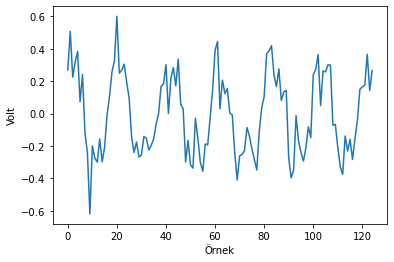

In [47]:
sensorData = loadmat('sensor_data.mat')
x1 = sensorData['x1'].astype(np.float)
xn = x1[0,:]
print(xn.shape)
n = np.arange(0,125)
plt.ylabel("Volt")
plt.xlabel("Örnek")
plt.plot(n,xn)

(Text(0, 0.5, 'phase (rad)'), Text(0.5, 0, 'frequency (w/pi)'))

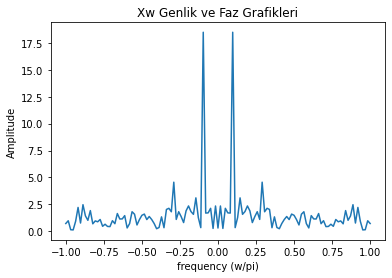

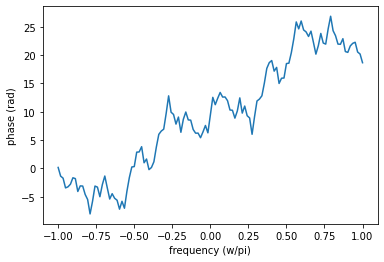

In [48]:
N = 125

Xw = np.fft.fftshift(fft(xn, N))
w = np.linspace(-np.pi, np.pi, N)
Xw_mag = abs(Xw)
Xw_phs = np.unwrap(np.angle(Xw))
plt.title("Xw Genlik ve Faz Grafikleri")

plt.plot(w/np.pi, Xw_mag)
plt.ylabel('Amplitude'), plt.xlabel('frequency (w/pi)')
plt.figure()
plt.plot(w/np.pi, Xw_phs)
plt.ylabel('phase (rad)'), plt.xlabel('frequency (w/pi)')

## Giriş sinyali spektrumuna bakıldığında, sinyal enerjisinin yaklaşık %90'ını (-0.2pi, +0.2pi) arasında bulundurduğu görülmüştür. Bu durumda filtre verileri aşağıdaki gibidir.

## Alçak geçiren filtre - Windowed FIR - Hamming-(N = 24)

## Kesme Frekansı: 0.2pi Hz
## Geçirme Frekansı: 0.15pi Hz
## Sönümleme bandı genlik değeri: 20 dB
## Geçirme bandı genlik değeri: 0.347 dB

In [49]:
# importing an IIR filter
filter_data = loadmat('low_pass_lab.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[:,0] # first column is b
print(b)

[ 0.00178386  0.00090539 -0.00151527 -0.00681879 -0.01387757 -0.01761122
 -0.01017571  0.01510666  0.05899889  0.11370508  0.16444293  0.19505575
  0.19505575  0.16444293  0.11370508  0.05899889  0.01510666 -0.01017571
 -0.01761122 -0.01387757 -0.00681879 -0.00151527  0.00090539  0.00178386]


Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

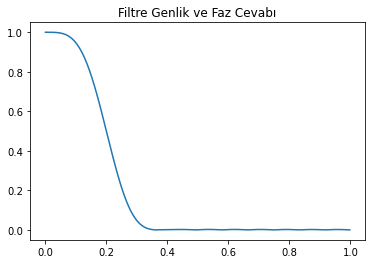

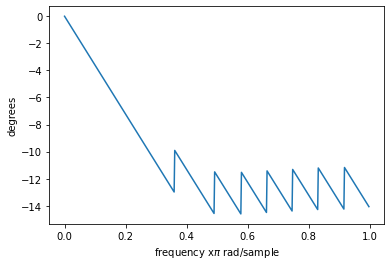

In [50]:
w, Hw = sgnl.freqz(b,1)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
plt.title("Filtre Genlik ve Faz Cevabı")

plt.plot(w/np.pi, Hw_mag)
plt.figure()
plt.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

Text(0, 0.5, 'group delay (samples)')

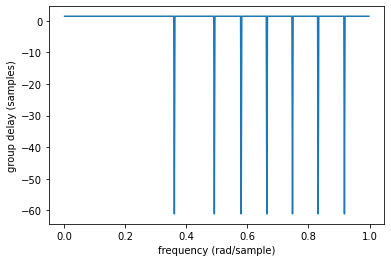

In [51]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

## Filtrenin faz cevabının lineer olduğu bölgelerde grup gecikmesinin beklendiği gibi sabit olduğu görülmüştür. Filtre lineer faza sahiptir. 

# B

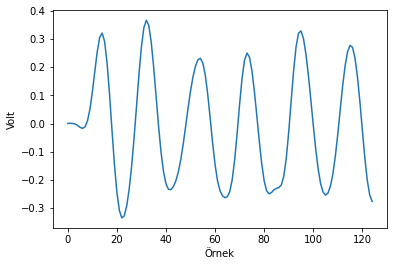

In [52]:
yn = sgnl.lfilter(b, 1, xn) # using the coefficients, we applied the␣,→signal to the input of the filter.
plt.figure()
plt.ylabel("Volt")
plt.xlabel("Örnek")
plt.plot(yn)

## Girişte verilmiş olan gürültülü sensör verisinin, uygun tasarlanan filtre ile çıkışta gürültüsü azaltılmıştır. (Tepe noktalarında bulunan ripple'lar azaltılmıştır.) Bu işlem sırasında giriş sinyali, çıkışta güç kaybetmiştir. Bu kayba karşılık çıkışta gürültüsüz sinyal elde edilmiştir. 

## Giriş işareti ile çıkış işaretine bakıldığında maksimum değer alan tepe noktalar kıyaslandığında yaklaşık 10 örneklik zaman kayması olduğu tespit edilmiştir.  

## Belirli bir sinyale karşılık filtre tasarlama becerisi edinildi.

## Spektrum analizi becerileri edinildi.
## .mat uzantılı dosyadan veri okuma becerisi edinildi.